# Simple fractional crystallization model
- This notebook shows how to calculate the sulfide and sulfate saturation contents for a petrolog fractional crystallization path using a wide variety of different models
You can download the Petrolog file here:
-https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Intro_Example_Petrolog_FC/PetrologCalculations.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command

In [27]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
pd.options.display.max_columns = None

### Import data 
- Here we have Ni and Cu contents in Petrolog, although in reality, its better to fit to observed Ni and Cu contents in your samples, as once you start to remove sulfide, you change Cu and Ni (alternatively an iterative model could be built of how these are removed).

In [2]:
df_out=ss.import_data('PetrologCalculations.xlsx', Petrolog=True)
df_out.head()

We have replaced all missing liquid oxides and strings with zeros. 


,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar
0,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1
1,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1
2,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1
3,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,NaN,NaN,1495.511,1
4,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,NaN,NaN,1484.230,1


## Example 1 - SCSS calculations

### Example 1a: Calculate SCSS using Smythe
- First, we perform calculations using a Fe/FeNiCu ratio determined by measuring sulfides in the sample suite we are trying to model by quantitative EDS analysis (see Wieser et al. 2019)

In [3]:
Smythe_FixedSulf=ss.calculate_S2017_SCSS(df=df_out,
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)
Smythe_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar
0,1163.632126,317.869126,1526.431,1,0.65,0.098489,0.458760,0.006900,0.162217,0.136728,0.000777,0.062247,0.006799,0.117975,0.044478,0.002341,0.000777,0.0,-12643.917846,-77.425761,-2992.954217,-1910.042747,-2133.469827,-923.846254,-589.186980,-67.922629,-0.0,3328.767457,-12843.656196,-73.937634,-3082.117373,-1984.261077,-2172.132780,-1041.911444,-609.912056,-66.914620,-0.0,3364.402871,7.059302,0.65,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1
1,1132.187652,309.279446,1516.580,1,0.65,0.097851,0.460128,0.006977,0.164018,0.131795,0.000786,0.062150,0.006740,0.119285,0.044970,0.002367,0.000785,0.0,-12681.596545,-78.282676,-3026.179002,-1841.131776,-2130.145227,-934.101871,-595.707729,-68.674435,-0.0,3333.484439,-12881.930112,-74.755944,-3116.331958,-1912.672440,-2168.747932,-1053.477703,-616.662177,-67.655269,-0.0,3369.170350,7.031907,0.65,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1
2,1099.523987,300.356720,1506.214,1,0.65,0.097284,0.461540,0.007056,0.165875,0.126736,0.000794,0.062014,0.006682,0.120635,0.045480,0.002394,0.000794,0.0,-12720.511949,-79.173986,-3060.433090,-1770.461624,-2125.481450,-944.675207,-602.466551,-69.463239,-0.0,3336.392958,-12921.460271,-75.607099,-3151.606511,-1839.256265,-2163.999637,-1065.402284,-623.658745,-68.432367,-0.0,3372.110005,7.002633,0.65,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1
3,1066.279038,291.275205,1495.511,1,0.65,0.096823,0.462968,0.007136,0.167753,0.121655,0.000804,0.061837,0.006628,0.122000,0.045995,0.002421,0.000803,0.0,-12759.875643,-80.066770,-3095.084610,-1699.479235,-2119.422207,-955.366577,-609.283904,-70.253349,-0.0,3337.176747,-12961.445800,-76.459662,-3187.290335,-1765.5157

#### plot results against FeO content

Text(0.5, 0, 'MgO Liq (Wt%)')

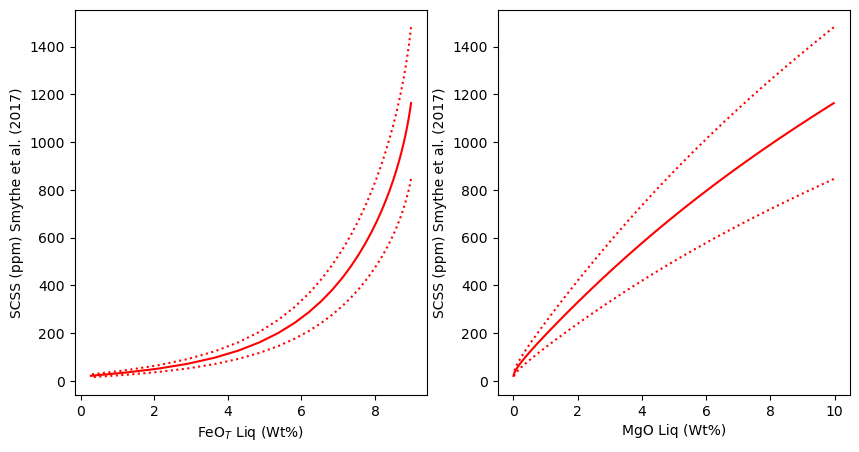

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.set_ylabel('SCSS (ppm) Smythe et al. (2017)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.set_ylabel('SCSS (ppm) Smythe et al. (2017)')
ax2.set_xlabel('MgO Liq (Wt%)')

### Example 1b: Using the ONeill model

In [5]:
ONeill_FixedSulf=ss.calculate_O2021_SCSS(df=df_out, 
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)

ONeill_FixedSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Si_Liq_cat_frac,Mg_Liq_cat_frac,Mn_Liq_cat_frac,Fet_Liq_cat_frac,Ca_Liq_cat_frac,Al_Liq_cat_frac,Na_Liq_cat_frac,K_Liq_cat_frac,Ti_Liq_cat_frac,P_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,Fe2_Liq_cat_frac
0,1117.435082,7.018791,-2.405572,-0.495104,7.309272,-2.200950,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1,0.512746,0.152817,0.000869,0.077174,0.131863,0.090654,0.024856,0.001308,0.007714,0.0,0.459113,0.136832,0.000778,0.069102,0.118070,0.162343,0.044512,0.002343,0.006907,0.0,0.664440,0.687150,0.062296
1,1085.704562,6.989984,-2.401368,-0.495001,7.373234,-2.289616,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1,0.514946,0.147496,0.000879,0.077100,0.133501,0.091780,0.025164,0.001324,0.007810,0.0,0.460485,0.131897,0.000786,0.068946,0.119382,0.164146,0.045005,0.002369,0.006984,0.0,0.656710,0.679537,0.062199
2,1053.015445,6.959413,-2.397406,-0.494856,7.441489,-2.384626,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1,0.517224,0.142026,0.000890,0.076986,0.135194,0.092944,0.025484,0.001341,0.007909,0.0,0.461902,0.126835,0.000795,0.068752,0.120734,0.166006,0.045516,0.002396,0.007063,0.0,0.648476,0.671438,0.062064
3,1020.044506,6.927602,-2.393819,-0.494668,7.513007,-2.484556,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,NaN,NaN,1495.511,1,0.519535,0.136518,0.000902,0.076833,0.136911,0.094125,0.025808,0.001359,0.008010,0.0,0.463336,0.121751,0.000804,0.068522,0.122101,0.167887,0.046032,0.002423,0.007143,0.0,0.639869,0.662987,0.061887
4,986.093004,6.893751,-2.390570,-0.494430,7.589560,-2.591950,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992

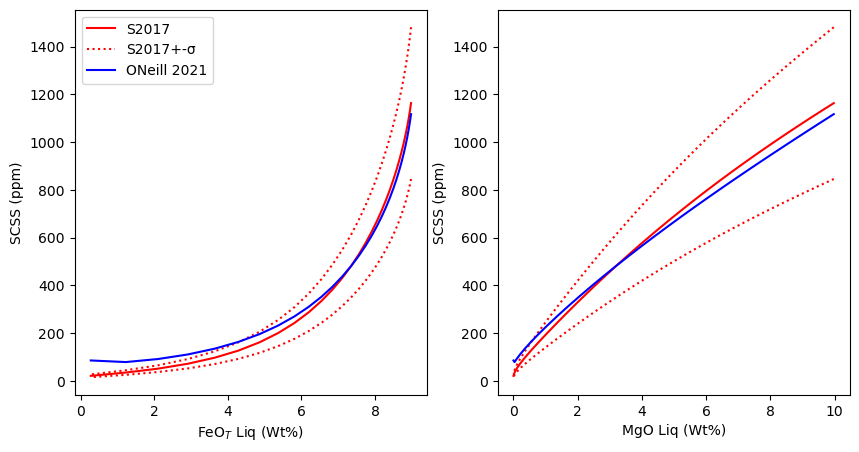

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r', label='S2017')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r', label='S2017+-σ')
ax1.plot(Smythe_FixedSulf['FeOt_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax1.plot(ONeill_FixedSulf['FeOt_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']+Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(Smythe_FixedSulf['MgO_Liq'], 
         Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017']-Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017_1sigma'],
         ':r')
ax2.plot(ONeill_FixedSulf['MgO_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()

### Example 1c: Using the Li and Zhang (2022 model)

In [7]:
LZ2022_FixedSulf=ss.calculate_LZ2022_SCSS(df=df_out, 
T_K=df_out['T_K'], P_kbar=df_out['P_kbar'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'],
Fe_FeNiCu_Sulf=0.65)
LZ2022_FixedSulf.head()

replacing Fe3Fet_Liq in the original dataframe with that input into the function


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,SCSS_Tot,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar,lnCHS_NKA_term,NaKAl,DeltaGRT,SumXMAM,lnCs,lnXFeO,LnrFeO,lnaFeS,C1PC2erf,lnS,S2_calc,lnXH2Ot,KOH,XOH,lnXOH,XH2Om,lnXH2Om,lnXOH_XH2O,lnCHScalc,HScal,NaKAlterm,HScal2,Si_cat,Ti_cat,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,944.864154,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1,-inf,-0.115398,7.303803,4.316075,-2.369795,2.776639,-0.371351,-0.495052,0.006797,6.851041,944.864154,-inf,0.894569,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.283851,0.0,0.458757,0.006902,0.162217,0.062247,0.000777,0.136726,0.117978,0.044478,0.002341,0.000777,0.0,0.006800
1,918.799931,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1,-inf,-0.116681,7.367736,4.328636,-2.457638,2.778198,-0.377121,-0.494949,0.006841,6.823068,918.799931,-inf,0.886706,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.335989,0.0,0.460124,0.006978,0.164017,0.062150,0.000786,0.131793,0.119288,0.044970,0.002367,0.000785,0.0,0.006741
2,891.807650,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1,-inf,-0.118000,7.435962,4.341439,-2.551906,2.780390,-0.383281,-0.494803,0.006888,6.793250,891.807650,-inf,0.878358,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.390696,0.0,0.461536,0.007058,0.165874,0.062014,0.000794,0.126734,0.120638,0.045480,0.002394,0.000794,0.0,0.006683
3,864.417345,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,NaN,NaN,1495.511,1,-inf,-0.119336,7.507449,4.354223,-2.651232,2.783245,-0.389729,-0.494615,0.006938,6.762056,864.417345,-inf,0.869664,-0.0,-inf,0.0,-inf,-inf,-inf,0.0,-2.447215,0.0,0.462964,0.007137,0.167752,0.061838,0.000804,0.121653,0.122003,0.045995,0.002421,0.000803,0.0,0.006629
4,836.086510,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0

## Example 1d: Using the Fortin et al. (2015) model at a fixed water content

In [8]:
F2015_3H=ss.calculate_F2015_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], H2O_Liq=3)
F2015_3H.head()

,SCSS_ppm_Fortin2015,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar
0,2076.915489,0.464725,0.138505,0.000787,0.069946,0.119513,0.082164,0.022528,0.001186,0.006992,0.000393,0.093260,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,3,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1
1,2013.157170,0.466615,0.133653,0.000797,0.069863,0.120971,0.083166,0.022802,0.001200,0.007077,0.000398,0.093458,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,3,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1
2,1947.376020,0.468571,0.128666,0.000806,0.069745,0.122477,0.084201,0.023087,0.001215,0.007165,0.000403,0.093662,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,3,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1
3,1880.920473,0.470555,0.123648,0.000817,0.069589,0.124004,0.085251,0.023375,0.001230,0.007254,0.000408,0.093867,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,3,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,NaN,NaN,1495.511,1
4,1812.435972,0.472608,0.118500,0.000828,0.069390,0.125582,0.086336,0.023672,0.001246,0.007347,0.000414,0.094078,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,3,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,95.9923,0,N,0,4.0077,PetrologDefault,08:21:15,NaN,NaN,1484.230,1


## Calculate expected FC trajectory

In [10]:
FC=ss.crystallize_S_incomp(S_init=1000, F_melt=df_out['Melt_%_magma']/100)

## Simple figure for paper

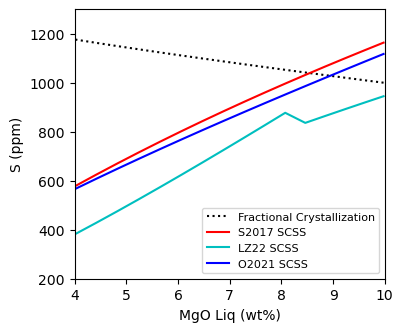

In [11]:
fig, (ax1) = plt.subplots(1, 1, figsize=(4,3.5))
ax1.plot(df_out['MgO_Liq'], FC, ':k', label='Fractional Crystallization')
ax1.plot(Smythe_FixedSulf['MgO_Liq'], 
Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'], '-r', label='S2017 SCSS')
ax1.plot(LZ2022_FixedSulf['MgO_Liq'], 
LZ2022_FixedSulf['SCSS_Tot'], '-c', label='LZ22 SCSS')
ax1.plot(ONeill_FixedSulf['MgO_Liq'],  
ONeill_FixedSulf['SCSS2_ppm'], '-b', label='O2021 SCSS')
ax1.set_ylabel('S (ppm)')
ax1.set_xlabel('MgO Liq (wt%)')
ax1.legend(fontsize=8)
plt.xlim([4, 10])
plt.ylim([200, 1300])
fig.savefig('SCSS_Models.png', dpi=200, bbox_inches='tight')

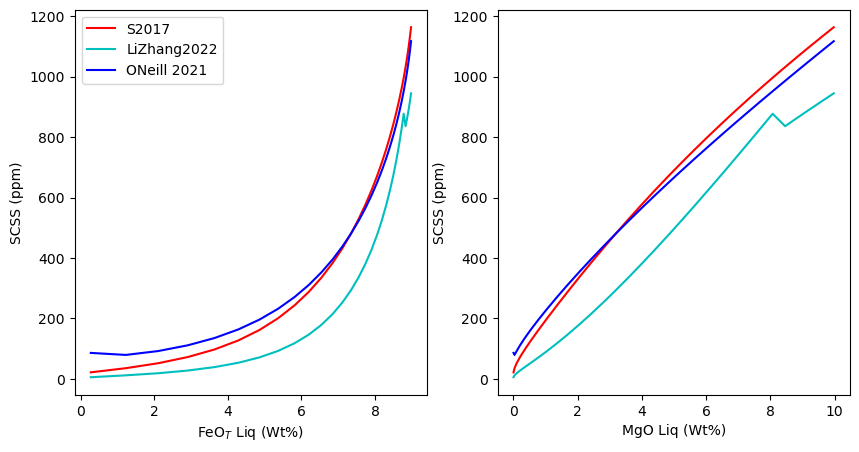

In [12]:

                         
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(Smythe_FixedSulf['FeOt_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r', label='S2017')
ax1.plot(LZ2022_FixedSulf['FeOt_Liq'], 
         LZ2022_FixedSulf['SCSS_Tot'],
         '-c', label='LiZhang2022')
ax1.plot(ONeill_FixedSulf['FeOt_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_FixedSulf['MgO_Liq'], Smythe_FixedSulf['SCSS_ideal_ppm_Smythe2017'],
         '-r')
ax2.plot(LZ2022_FixedSulf['MgO_Liq'], 
         LZ2022_FixedSulf['SCSS_Tot'],
         '-c', label='LiZhang2022')
ax2.plot(ONeill_FixedSulf['MgO_Liq'], 
         ONeill_FixedSulf['SCSS2_ppm'],
         '-b', label='ONeill 2021')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()

### Example 1e - Calculated sulfide composition
- We can use the Smythe 2017 SCSS model with the Symthe or ONeill calc sulfide model

In [13]:
Smythe_ONeillSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf="Calc_ONeill",
Ni_Liq=df_out['Ni_Liq_ppm'],
Cu_Liq=df_out['Cu_Liq_ppm'], 
Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_ONeillSulf.head()

You havent entered a value for Ni_FeNiCu_Sulf and Cu_FeNiCu_Sulf so we cant calculate the non-ideal SCSS


,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar,Fe_FeNiCu_Sulf_calc
0,737.138239,201.363887,1526.431,1,0.411762,0.098489,0.458760,0.006900,0.162217,0.136728,0.000777,0.062247,0.006799,0.117975,0.044478,0.002341,0.000777,0.0,-12643.917846,-77.425761,-2992.954217,-1910.042747,-2133.469827,-923.846254,-589.186980,-67.922629,-0.0,3328.767457,-12843.656196,-73.937634,-3082.117373,-1984.261077,-2172.132780,-1041.911444,-609.912056,-66.914620,-0.0,3364.402871,6.602775,0.411762,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1,0.411762
1,751.679396,205.336092,1516.580,1,0.431546,0.097851,0.460128,0.006977,0.164018,0.131795,0.000786,0.062150,0.006740,0.119285,0.044970,0.002367,0.000785,0.0,-12681.596545,-78.282676,-3026.179002,-1841.131776,-2130.145227,-934.101871,-595.707729,-68.674435,-0.0,3333.484439,-12881.930112,-74.755944,-3116.331958,-1912.672440,-2168.747932,-1053.477703,-616.662177,-67.655269,-0.0,3369.170350,6.622310,0.431546,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1,0.431546
2,764.865429,208.938117,1506.214,1,0.452162,0.097284,0.461540,0.007056,0.165875,0.126736,0.000794,0.062014,0.006682,0.120635,0.045480,0.002394,0.000794,0.0,-12720.511949,-79.173986,-3060.433090,-1770.461624,-2125.481450,-944.675207,-602.466551,-69.463239,-0.0,3336.392958,-12921.460271,-75.607099,-3151.606511,-1839.256265,-2163.999637,-1065.402284,-623.658745,-68.432367,-0.0,3372.110005,6.639700,0.452162,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1,0.452162
3,775.897941,211.951866,1495.511,1,0.472985,0.096823,0.462968,0.007136,0.167753,0.121655,0.000804,0.061837,0.006628,0.122000,0.045995,0.002421,0.000803,0.0,-12759.875643,-80.066770,-3095.084610,-1699.479235,-2119.422207,-955.366577,-609.283904,-70.2

In [14]:
Smythe_SmytheSulf=ss.calculate_S2017_SCSS(df=df_out, T_K=df_out['T_K'], 
P_kbar=df_out['P_kbar'], Fe_FeNiCu_Sulf="Calc_Smythe", Ni_Liq=df_out['Ni_Liq_ppm'],
Cu_Liq=df_out['Cu_Liq_ppm'], Fe3Fet_Liq=df_out['Fe3Fet_Liq'])

Smythe_SmytheSulf.head()

,SCSS_ideal_ppm_Smythe2017,SCSS_ideal_ppm_Smythe2017_1sigma,SCSS_non_ideal_ppm_Smythe2017,SCSS_non_ideal_ppm_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,Mn_wt_atom,Fe2_wt_atom,Fe3_wt_atom,Ca_wt_atom,Na_wt_atom,K_wt_atom,P_wt_atom,H_wt_atom,Ni_Sulf_Calc,Cu_Sulf_Calc,Fe_Sulf_Calc,O_Sulf_Calc,S_Sulf_Calc,Si_XA_ideal,Ti_XA_ideal,Al_XA_ideal,Mg_XA_ideal,Fe2_XA_ideal,Ca_XA_ideal,Na_XA_ideal,K_XA_ideal,H_XA_ideal,Si*Fe_ideal,Si_XA_non_ideal,Ti_XA_non_ideal,Al_XA_non_ideal,Mg_XA_non_ideal,Fe2_XA_non_ideal,Ca_XA_non_ideal,Na_XA_non_ideal,K_XA_non_ideal,H_XA_non_ideal,Si*Fe_non_ideal,log_SCSS_ideal,log_SCSS_non_ideal,Fe_FeNiCu_Sulf_calc,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar
0,404.163168,110.405162,416.652656,111.370872,1526.431,1,0.225764,0.098489,0.458760,0.006900,0.162217,0.136728,0.000777,0.062247,0.006799,0.117975,0.044478,0.002341,0.000777,0.0,30.0,24.842869,14.689694,0.617110,29.850327,-12643.917846,-77.425761,-2992.954217,-1910.042747,-2133.469827,-923.846254,-589.186980,-67.922629,-0.0,3328.767457,-12843.656196,-73.937634,-3082.117373,-1984.261077,-2172.132780,-1041.911444,-609.912056,-66.914620,-0.0,3364.402871,6.001819,6.032253,0.225764,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1
1,426.633320,116.543328,435.666010,116.453124,1516.580,1,0.244934,0.097851,0.460128,0.006977,0.164018,0.131795,0.000786,0.062150,0.006740,0.119285,0.044970,0.002367,0.000785,0.0,30.0,23.312085,15.905289,0.613639,30.168987,-12681.596545,-78.282676,-3026.179002,-1841.131776,-2130.145227,-934.101871,-595.707729,-68.674435,-0.0,3333.484439,-12881.930112,-74.755944,-3116.331958,-1912.672440,-2168.747932,-1053.477703,-616.662177,-67.655269,-0.0,3369.170350,6.055925,6.076876,0.244934,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1
2,450.330338,123.016637,455.176828,121.668348,1506.214,1,0.266219,0.097284,0.461540,0.007056,0.165875,0.126736,0.000794,0.062014,0.006682,0.120635,0.045480,0.002394,0.000794,0.0,30.0,21.619458,17.249266,0.609589,30.521686,-12720.511949,-79.173986,-3060.433090,-1770.461624,-2125.481450,-944.675207,-602.466551,-69.463239,-0.0,3336.392958,-12921.460271,-75.607099,-3151.606511,-1839.256265,-2163.999637,-1065.402284,-623.658745,-68.432367,-0.0,3372.110005,6.109981,6.120686,0.266219,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.

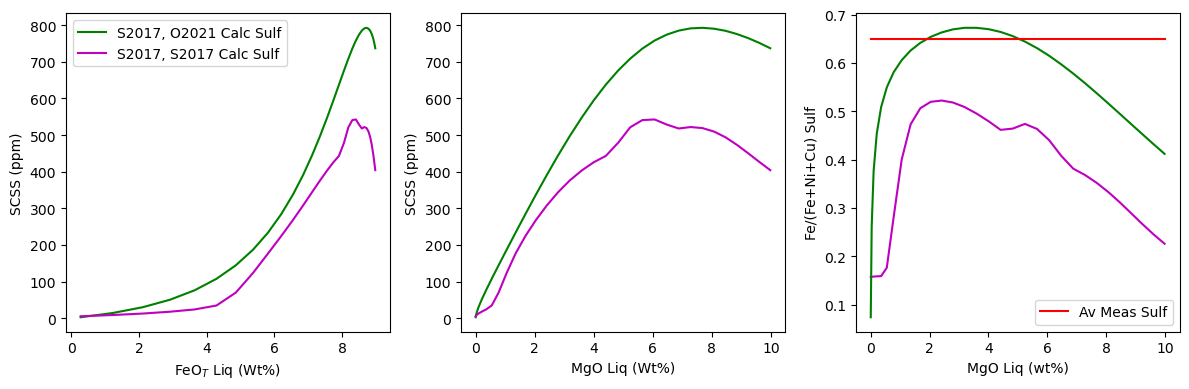

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(Smythe_ONeillSulf['FeOt_Liq'], Smythe_ONeillSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g', label='S2017, O2021 Calc Sulf')

ax1.plot(Smythe_SmytheSulf['FeOt_Liq'], 
         Smythe_SmytheSulf['SCSS_ideal_ppm_Smythe2017'],
         '-m', label='S2017, S2017 Calc Sulf')
ax1.set_ylabel('SCSS (ppm)')
ax1.set_xlabel('FeO$_{T}$ Liq (Wt%)')

ax2.plot(Smythe_ONeillSulf['MgO_Liq'], Smythe_ONeillSulf['SCSS_ideal_ppm_Smythe2017'],
         '-g')
ax2.plot(Smythe_SmytheSulf['MgO_Liq'], 
         Smythe_SmytheSulf['SCSS_ideal_ppm_Smythe2017'],
         '-m', label='S2017, S2017 Calc Sulf')
ax2.set_ylabel('SCSS (ppm)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.legend()


ax3.plot(Smythe_SmytheSulf['MgO_Liq'],
         Smythe_SmytheSulf['Fe_FeNiCu_Sulf'],
         '-m')
ax3.plot(Smythe_ONeillSulf['MgO_Liq'],
         Smythe_ONeillSulf['Fe_FeNiCu_Sulf'],
         '-g')
ax3.plot([0, 10], [0.65, 0.65], '-r', label='Av Meas Sulf')
ax3.legend()
ax3.set_ylabel('Fe/(Fe+Ni+Cu) Sulf')
ax3.set_xlabel('MgO Liq (wt%)')
fig.tight_layout()

## Example 2: SCAS models
- This petrolog model is for Hawaii, so it is unlikely you would ever want to calculate SCAS, but just incase, we show how to do it here!

In [17]:
CD19_SCAS=ss.calculate_CD2019_SCAS(df=df_out, T_K=df_out['T_K'])
ZT22_SCAS=ss.calculate_ZT2022_SCAS(df=df_out, T_K=df_out['T_K'])

In [19]:
CD19_SCAS.head()

,Calc SCAS (ppm),lnXS,Xs,molesS,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,P2O5_Liq,H2O_Liq,Fe3Fet_Liq,Ni_Liq_ppm,Cu_Liq_ppm,SiO2_magma,TiO2_magma,Al2O3_magma,Fe2O3_magma,FeO_magma,MnO_magma,MgO_magma,CaO_magma,Na2O_magma,K2O_magma,P2O5_magma,Cr2O3_magma,Ni_magma,Cu_magma,Cr2O3_Liq,Ni_Liq,Cu_Liq,SiO2_cumulate,TiO2_cumulate,Al2O3_cumulate,Fe2O3_cumulate,FeO_cumulate,MnO_cumulate,MgO_cumulate,CaO_cumulate,Na2O_cumulate,K2O_cumulate,P2O5_cumulate,Cr2O3_cumulate,Ni_cumulate,Cu_cumulate,Temperature,Temperature_Olv,Olv_Fo_magma,Olv_Kd,Olv_Fo_cumulate,Pressure(kbar),Lg(fO2),dNNO,density,Ln(viscosity),Melt_%_magma,Olv_%_magma,Olv_Peritectic,Fluid_%_magma,Olv_%_cumulate,Sample,Unnamed:58,fo2_calc,fo2_e_calc,T_K,P_kbar,SiO2_Liq_mol_prop,MgO_Liq_mol_prop,MnO_Liq_mol_prop,FeOt_Liq_mol_prop,CaO_Liq_mol_prop,Al2O3_Liq_mol_prop,Na2O_Liq_mol_prop,K2O_Liq_mol_prop,TiO2_Liq_mol_prop,P2O5_Liq_mol_prop,H2O_Liq_mol_prop,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,H2O_Liq_mol_frac
0,22381.770953,-3.173787,0.041845,0.069801,49.9010,0.9981,14.9715,8.980926,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0,0.098489,697.8,99.8,49.9010,0.9981,14.9715,0.9839,8.0964,0.0998,9.9763,11.9772,2.4953,0.1996,0.0998,0.0998,697.8,99.8,0.0998,697.8,99.8,40.2986,0,0,0,11.7372,0,46.9121,0,0,0,0,0,8257.6,10.0,1253.281,1253.281,87.69,0.308,87.69,1,-7.72,-0.7,2.683,6.25,99.9900,0,N,0,0.0100,PetrologDefault,08:21:15,1.905461e-08,0.000444,1526.431,1,0.833854,0.248519,0.001413,0.125504,0.214442,0.147426,0.040422,0.002128,0.012545,0.0,0.0,0.512746,0.152817,0.000869,0.077174,0.131863,0.090654,0.024856,0.001308,0.007714,0.0,0.0
1,24252.043336,-3.093293,0.045352,0.075634,49.9978,1.0081,15.1220,8.951296,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.0,0.097851,624.6,100.7,49.9978,1.0081,15.1220,0.9743,8.0754,0.1008,9.6064,12.0976,2.5203,0.2016,0.1008,0.1008,624.6,100.7,0.1008,624.6,100.7,40.2698,0,0,0,11.9273,0,46.7855,0,0,0,0,0,7984.5,10.0,1243.430,1243.430,87.28,0.309,87.49,1,-7.83,-0.7,2.682,6.38,98.9950,0,N,0,1.0050,PetrologDefault,08:21:15,NaN,NaN,1516.580,1,0.835420,0.239289,0.001427,0.125082,0.216584,0.148898,0.040825,0.002149,0.012670,0.0,0.0,0.514946,0.147496,0.000879,0.077100,0.133501,0.091780,0.025164,0.001324,0.007810,0.0,0.0
2,26332.709650,-3.010922,0.049246,0.082123,50.0982,1.0185,15.2770,8.916645,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.0,0.097284,554.8,101.6,50.0982,1.0185,15.2770,0.9649,8.0492,0.1018,9.2279,12.2216,2.5462,0.2037,0.1018,0.1018,554.8,101.6,0.1018,554.8,101.6,40.2390,0,0,0,12.1280,0,46.6507,0,0,0,0,0,7708.8,10.1,1233.064,1233.064,86.83,0.310,87.27,1,-7.94,-0.7,2.681,6.52,97.9904,0,N,0,2.0096,PetrologDefault,08:21:15,NaN,NaN,1506.214,1,0.837050,0.229848,0.001441,0.124591,0.218792,0.150416,0.041242,0.002171,0.012800,0.0,0.0,0.517224,0.142026,0.000890,0.076986,0.135194,0.092944,0.025484,0.001341,0.007909,0.0,0.0
3,28603.678810,-2.928343,0.053486,0.089205,50.2003,1.0289,15.4337,8.877334,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.0,0.096823,489.9,102.6,50.2003,1.0289,15.4337,0.9561,8.0178,0.1029,8.8486,12.3469,2.5723,0.2058,0.1029,0.1029,489.9,102.6,0.1029,489.9,102.6,40.2069,0,0,0,12.3359,0,46.5096,0,0,0,0,0,7436.5,10.1,1222.361,1222.361,86.36,0.311,87.05,1,-8.05,-0.7,2.680,6.67,96.9959,0,N,0,3.0041,PetrologDefault,08:21:15,NaN,NaN,1495.511,1,0.838712,0.220389,0.001456,0.124035,0.221023,0.151951,0.041663,0.002193,0.012930,0.0,0.0,0.519535,0.136518,0.000902,0.076833,0.136911,0.094125,0.025808,0.001359,0.008010,0.0,0.0
4,31130.910816,-2.844053,0.058189,0.097087,50.3062,1.0397,15.5950,8.832002,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.0,0.096445,428.7,103.5,50.3062,1.0397,15.5950,0.9475,7.9802,0.1040,8.4612,12.4760,2.5992,0.2079,0.1040,0.1040,428.7,103.5,0.1040,428.7,103.5,40.1725,0,0,0,12.5558,0,46.3589,0,0,0,0,0,7162.8,10.2,1211.080,1211.080,85.84,0.312,86.81,1,-8.18,-0.7,2.679,6.83,

Text(0, 0.5, 'SCAS (wt%)')

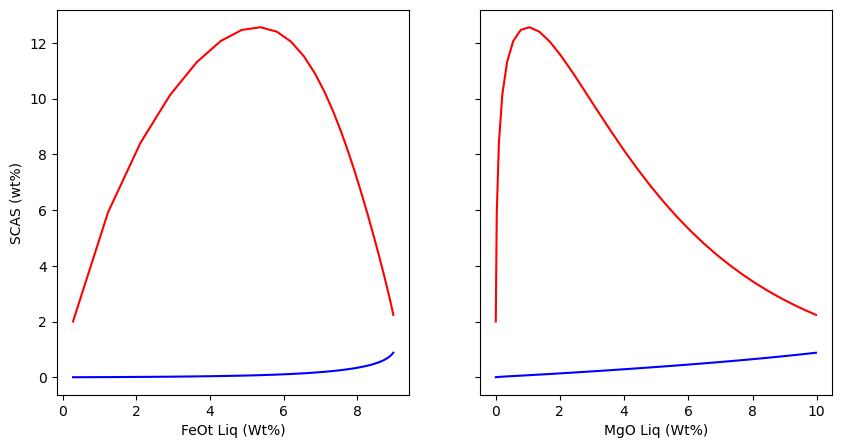

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(CD19_SCAS['FeOt_Liq'], CD19_SCAS['Calc SCAS (ppm)']/10000, '-r', label='CD19')
ax2.plot(CD19_SCAS['MgO_Liq'], CD19_SCAS['Calc SCAS (ppm)']/10000, '-r', label='CD19')
ax1.plot(ZT22_SCAS['FeOt_Liq'], ZT22_SCAS['Calc SCAS (ppm)']/10000, '-b', label='CD19')
ax2.plot(ZT22_SCAS['MgO_Liq'], ZT22_SCAS['Calc SCAS (ppm)']/10000, '-b', label='CD19')
ax1.set_xlabel('FeOt Liq (Wt%)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.set_ylabel('SCAS (wt%)')


Text(0, 0.5, 'SCAS (wt%)')

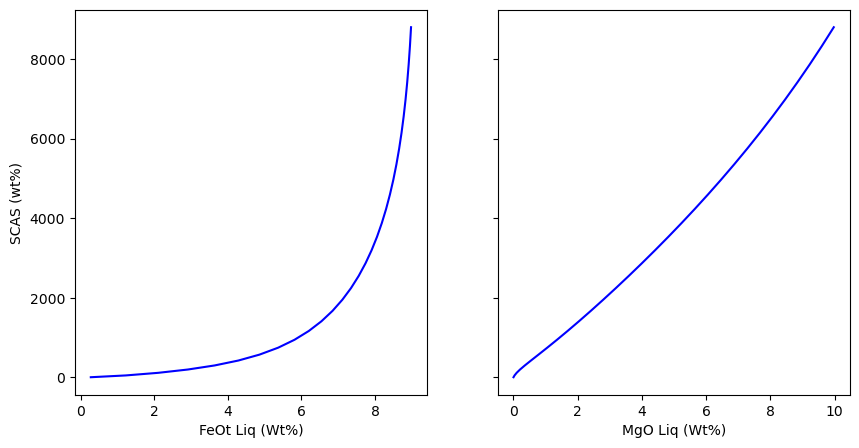

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.plot(ZT22_SCAS['FeOt_Liq'], ZT22_SCAS['Calc SCAS (ppm)'], '-b', label='CD19')
ax2.plot(ZT22_SCAS['MgO_Liq'], ZT22_SCAS['Calc SCAS (ppm)'], '-b', label='CD19')
ax1.set_xlabel('FeOt Liq (Wt%)')
ax2.set_xlabel('MgO Liq (Wt%)')
ax1.set_ylabel('SCAS (wt%)')


## Example 3 - Calculating amount of sulfide which has formed

In [23]:
help(ss.calculate_mass_frac_sulf)

Help on function calculate_mass_frac_sulf in module PySulfSat.sulf_mass_balance:

calculate_mass_frac_sulf(S_model=None, S_init=None, F_melt=None, S_sulf=None)
    Calculates mass fraction of sulfide removed for a given SCSS value, a S content in the melt,
    and S content in the sulfide
    
    Parameters
    --------------
    S_model: int, float, pd.Series
        modelled amount of S present in the melt in ppm (could be SCSS2-, SCSStot, or SCAS, or STot from another method)
    S_init: int, float, pd.Series
        initial S content of the system where F_melt=1 in ppm
    F_melt:  int, float, pd.Series
        melt fraction (between 0 and 1)
    S_sulf:  int, float, pd.Series
        S content of the sulfide in ppm
    
    Returns
    --------------
    Mass fraction of sulfide



In [24]:
# Get F from the Petrolog input
F_melt=df_out['Melt_%_magma']/100
# Select inital S content, from other knowledge of the system, highest S melt inclusion etc.
S_init=1600
# Amount of S in the sulfide
S_sulf=32*10**4
# Which SCSS model you have choosen
S_model=ONeill_FixedSulf['SCSS2_ppm']

In [25]:
Mass_Frac_S=ss.calculate_mass_frac_sulf(F_melt=F_melt,
            S_init=S_init, S_sulf=S_sulf, S_model=S_model)
Mass_Frac_S.head()

0    0.001508
1    0.001641
2    0.001775
3    0.001908
4    0.002042
dtype: float64

Text(0, 0.5, 'Mass % sulfide')

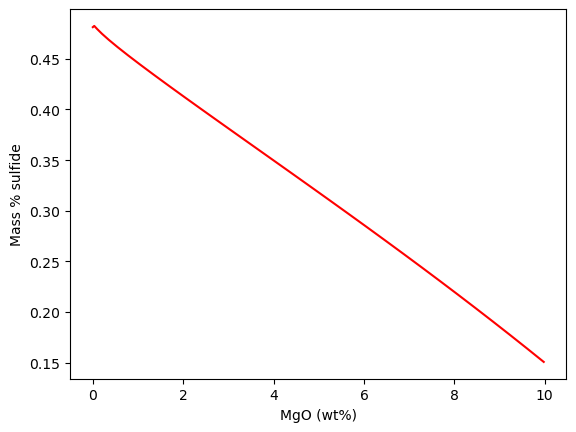

In [26]:
plt.plot(df_out['MgO_Liq'], 100*Mass_Frac_S, '-r')
plt.xlabel('MgO (wt%)')
plt.ylabel('Mass % sulfide')

## Example 4 - S6 Corrections
- In reality, we may have some S6+ in our samples. We can use the Nash and Jugo models to try to account for this, based on our Fe3Fet_Liq ratios from Petrolog, or S6+ proportions measured by methods such as XANES

### First, we use the python package Thermobar (Wieser et al. 2022) to convert our measured Fe3 proportion into a buffer position (needed for Jugo)
- You will need to pip install Thermobar if it is not already installed

In [ ]:
#!pip install Thermobar

In [ ]:
import Thermobar as pt
pt.__version__

### This function converts from a logfo2 value into QFM and NNO buffer positions
- You'll see that this matches the petrolog answer

In [ ]:
Buffer_calc=pt.convert_fo2_to_buffer(fo2=10**df_out['Lg(fO2)'], 
                                     T_K=df_out['T_K'],  P_kbar=df_out['P_kbar'])
Buffer_calc.head()

## This function, converts FeO and Fe2O3 from your input into a buffer position
- The more observant among you will notice this doesnt match at all. This is because Petrolog is using Borisov and Shapkin, while Thermobar is using Kress and Carmichael. There is almost a log unit offset between them, which is another uncertainty to consider!

In [ ]:
df_out.columns

In [ ]:
if any(df_out.columns=="FeOt_Liq"):
    print('yes')

In [ ]:
df_Kress91=pt.convert_fe_partition_to_fo2(liq_comps=df_out, T_K=df_out['T_K'],  P_kbar=df_out['P_kbar'],
 model="Kress1991", renorm=True)
df_Kress91.head()

### Now, lets use Jugo to calculate fo2 for both Kress and Borisov

In [ ]:
Jugo_Kress_S6=ss.calculate_S6St_Jugo2010_eq10(DeltaQFM=df_Kress91['DeltaQFM'])
Jugo_Bor_S6=ss.calculate_S6St_Jugo2010_eq10(DeltaQFM=Buffer_calc['deltaNNO_Frost1991'])

## Now lets use Nash to calculate fo2 based on the Petrolog Fe3Fet ratio

In [ ]:
Nash_S6=ss.calculate_S6St_Nash2019(T_K=df_out['T_K'], Fe3Fet_Liq=df_out['Fe3Fet_Liq'])
Nash_S6.head()

### Lets recalculate the Petrolog Fe3Fet ratio based on the buffer we ran the calculations at

In [ ]:

Recalc_Fe3Fet_Kress=pt.convert_fo2_to_fe_partition(liq_comps=df_out, 
                        T_K=df_out['T_K'], P_kbar=df_out['P_kbar'],
                        fo2=10**df_out['Lg(fO2)'])
Recalc_Fe3Fet_Kress['Fe3Fet_Liq'].head()                                            

In [ ]:
Nash_S6_Recalc=ss.calculate_S6St_Nash2019(T_K=df_out['T_K'], Fe3Fet_Liq=Recalc_Fe3Fet_Kress['Fe3Fet_Liq'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_out['MgO_Liq'], 100*Jugo_Kress_S6, '-r', label='Jugo-Kress')
ax1.plot(df_out['MgO_Liq'], 100*Jugo_Bor_S6, '-b', label='Jugo-Boro')
ax1.plot(df_out['MgO_Liq'], 100*Nash_S6, '-c', label='Nash')

ax2.plot(df_out['MgO_Liq'], 100*Jugo_Kress_S6, '-r', label='Jugo-Kress')
ax2.plot(df_out['MgO_Liq'], 100*Jugo_Bor_S6, '-b', label='Jugo-Boro')
ax2.plot(df_out['MgO_Liq'], 100*Nash_S6, '-c', label='Nash')
ax2.plot(df_out['MgO_Liq'], 100*Nash_S6_Recalc, ':c', label='Nash-KressRecalc')

ax1.set_xlabel('MgO Liquid (wt%)')
ax1.set_ylabel('S6/ST (%)')
ax2.set_xlabel('MgO Liquid (wt%)')
ax2.set_ylabel('S6/ST (%)')
ax2.legend()
ax1.set_xlim([2, 10])
ax2.set_xlim([2, 10])

## Perform correction

In [ ]:
SCSS_Tot_Nash_Recalc_ONeill=ss.calculate_SCSS_Total(SCSS=ONeill_FixedSulf['SCSS2_ppm'],
S6St_Liq=Nash_S6_Recalc)
SCSS_Tot_Nash_Recalc_ONeill